In [10]:


import cv2 as cv
import matplotlib.pyplot as plt

### Helper Functions

In [11]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1 -	Open ‘OpenCV’ and ‘I_Love_OpenCV’ images. 

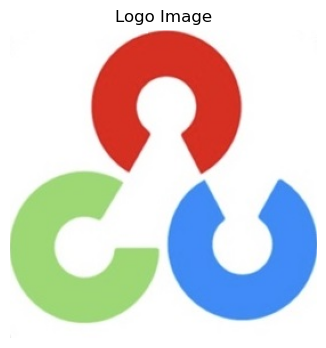

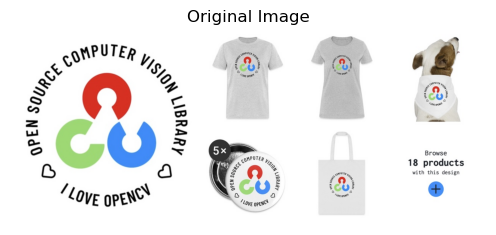

In [12]:
img1_original = cv.imread('Assignment3_Files/OpenCV.jpg')
img2_original = cv.imread('Assignment3_Files/I_Love_OpenCV.jpg')

assert img1_original is not None, 'OpenCV not found'
assert img2_original is not None, 'I Love OpenCV not found'

show(img1_original, 'Logo Image', 4)
show(img2_original, 'Original Image')

### 2 -	Use ORB descriptors to match features. Show the results for the top 15 and the top 20 matches using the matcher below and paste the results here. 
        - a.	BFMatcher
        - b.	FlanBasedMatcher


In [13]:
img1 = cv.cvtColor(img1_original, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2_original, cv.COLOR_BGR2GRAY)

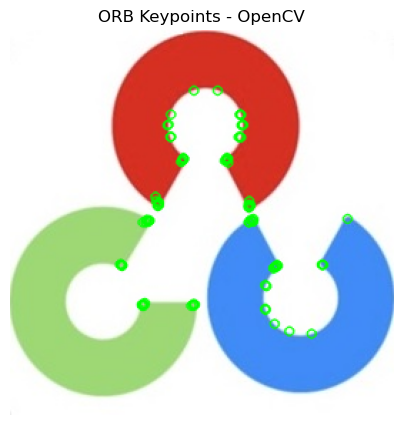

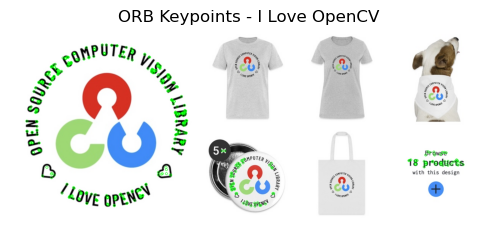

In [14]:
orb = cv.ORB_create()
 
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
 
kp_img_1 = cv.drawKeypoints(img1_original, kp1, None, color=(0,255,0), flags=0)
kp_img_2 = cv.drawKeypoints(img2_original, kp2, None, color=(0,255,0), flags=0)
show(kp_img_1, 'ORB Keypoints - OpenCV', 5)
show(kp_img_2, 'ORB Keypoints - I Love OpenCV')


#### BFMatcher

In [15]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

matches_bf = bf.match(des1, des2)

matches_bf = sorted(matches_bf, key=lambda x: x.distance)

img_bf_15 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:15], None)
img_bf_20 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:20], None)
# img_bf_20 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

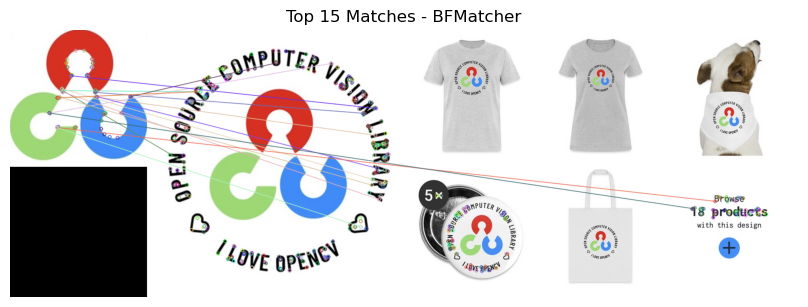

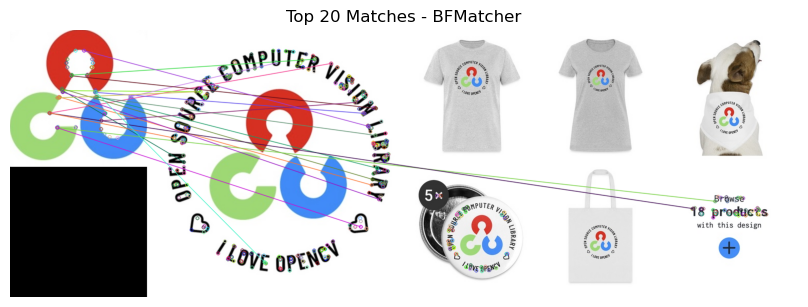

In [16]:
show(img_bf_15, 'Top 15 Matches - BFMatcher', 30)
show(img_bf_20, 'Top 20 Matches - BFMatcher', 30)

#### FlanBasedMatcher

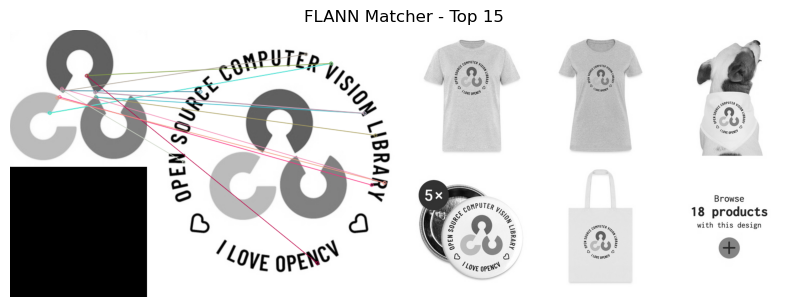

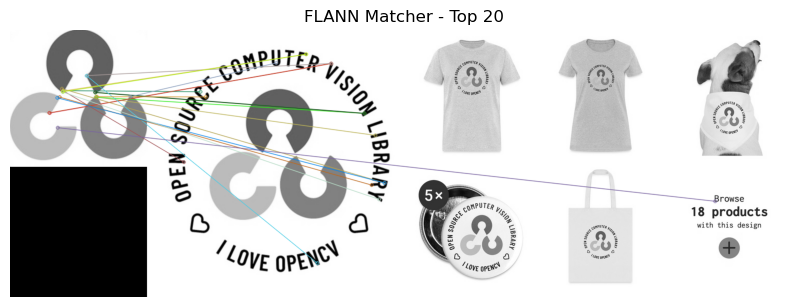

In [17]:
index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50) 

flann = cv.FlannBasedMatcher(index_params,search_params)
flann_matches = flann.match(des1,des2)

flann_matches = sorted(flann_matches, key=lambda x: x.distance)

img_15 = cv.drawMatches(img1, kp1, img2, kp2, flann_matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_15, 'FLANN Matcher - Top 15', 30)

img_20 = cv.drawMatches(img1, kp1, img2, kp2, flann_matches[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_20, 'FLANN Matcher - Top 20', 30)

### 3 -	How are the keypoints matched? What is the difference between these two matchers? Which one works better? Why is that?
- Keypoints are matched by comparing their ORB binary descriptors, using the Hamming distance to assess similarity. For each keypoint in both images, descriptors are extracted, and the Hamming distance is computed between these descriptors. The pairs with the smallest distances are identified as matches, and the best matches (top 15 or 20) are chosen for further analysis.

- BFMatchers compares the descriptors of the keypoints of both images, also computing the euclidean distance between the descriptors in one images, and the other image's descriptors before selecting the closest match.
FLANNBasedMatcher uses approximate nearest neighbor search for faster matching. It relies on advanced data structures (like KD-trees) to speed up the search, but may sometimes sacrifice a bit of accuracy in favor of speed.

- BFMatcher generally performs better when it comes to matching ORB descriptors.

- BFMatcher calculates the exact Hamming distance for all pairs of descriptors, providing the most accurate matches. This precision is essential for binary descriptors like ORB, where a detailed bit-by-bit comparison is key to determining similarity. While FlannBasedMatcher can be set up to handle binary descriptors using LSH, it adds a layer of complexity. Its approximate approach might result in less accurate matches, potentially overlooking some correct matches or introducing false positives.

### 4 -	Use SIFT descriptors to match features. Use a FlanBasedMatcher and apply Ratio Matching to filter matches. Paste the results for the distance ratio of 0.6 and 0.8. 

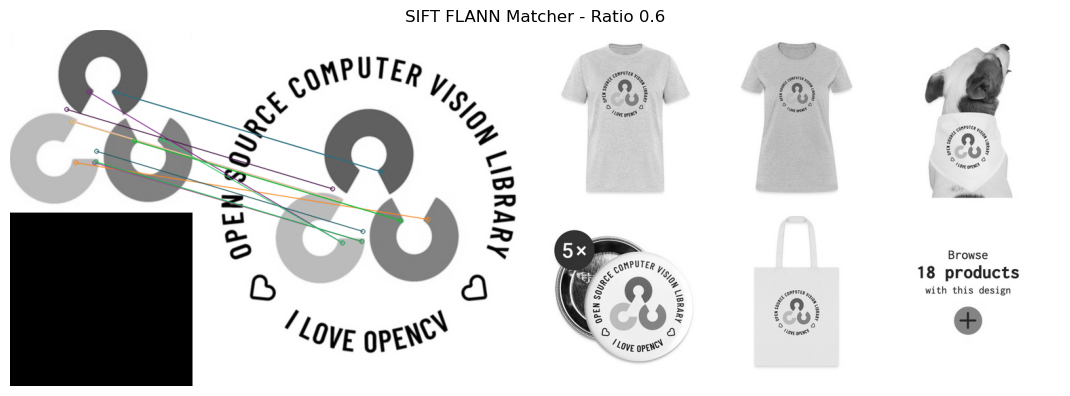

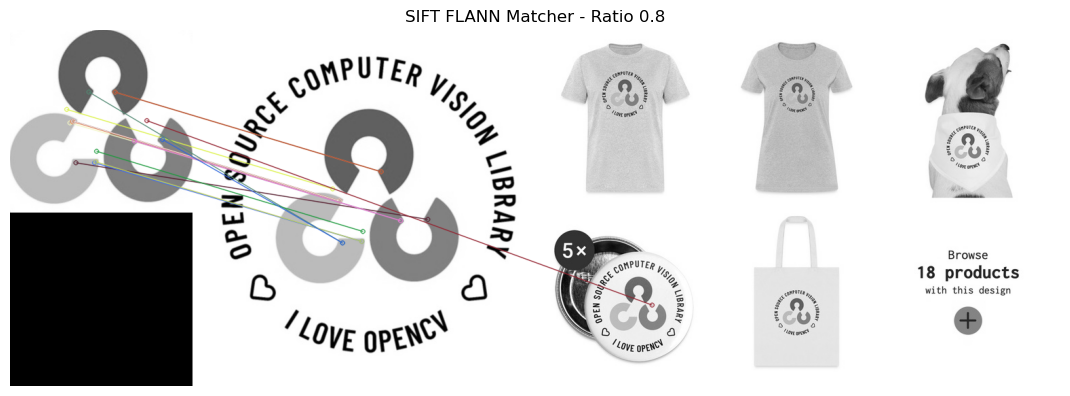

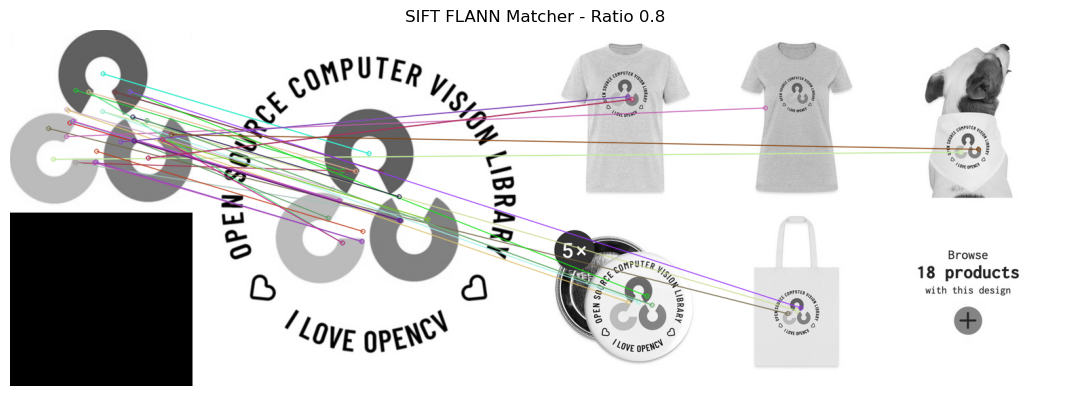

In [18]:
sift = cv.SIFT_create()
 
skp1, sdes1 = sift.detectAndCompute(img1, None)
skp2, sdes2 = sift.detectAndCompute(img2,None)
 

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
 

flann = cv.FlannBasedMatcher(index_params,search_params)
flann_matches = flann.knnMatch(sdes1,sdes2,k=2)

ratio_06_matches = []
ratio_08_matches = []
ratio_10_matches = []

for m, n in flann_matches:
    if m.distance < 0.6 * n.distance:
        ratio_06_matches.append(m)
    if m.distance < 0.8 * n.distance:
        ratio_08_matches.append(m)
    if m.distance < 1.0 * n.distance:
        ratio_10_matches.append(m)


img_06 = cv.drawMatches(img1, skp1, img2, skp2, ratio_06_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_06, 'SIFT FLANN Matcher - Ratio 0.6', 40)

img_08 = cv.drawMatches(img1, skp1, img2, skp2, ratio_08_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_08, 'SIFT FLANN Matcher - Ratio 0.8', 40)

img_10 = cv.drawMatches(img1, skp1, img2, skp2, ratio_10_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_10, 'SIFT FLANN Matcher - Ratio 0.8', 40)

### 5 - How does the distance ratio affect the matches?
The distance ratio in ratio matching filters is determined by comparing the closest and second-closest SIFT descriptor matches. A lower ratio, such as 0.6, enforces stricter filtering, retaining only the most distinct and reliable matches, which enhances accuracy but leads to fewer overall matches. Conversely, a higher ratio, like 0.8, permits more matches by loosening the filter, but this increases the likelihood of accepting incorrect or ambiguous matches. Therefore, a lower ratio emphasizes match quality, while a higher ratio aims to capture more matches, albeit with a greater risk of false positives.